<a href="https://colab.research.google.com/github/Prasid23/Assignment-1/blob/main/2428117_PrasidSunwar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
path ="/content/drive/MyDrive/DATASET/anxiety_attack_dataset.csv"
df = pd.read_csv(path)

In [44]:
# Target Variable: Family History of Anxiety (Yes=1, No=0)
df["Family History of Anxiety"] = df["Family History of Anxiety"].map({'Yes': 1, 'No': 0})

In [45]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Check if "Family History of Anxiety" is in the list before trying to remove it
if "Family History of Anxiety" in categorical_cols:
    categorical_cols.remove("Family History of Anxiety")  # Exclude target variable
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [46]:
# Drop unnecessary columns
X = df.drop(columns=["Family History of Anxiety", "ID"])
y = df["Family History of Anxiety"]

In [47]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [50]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [51]:
# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Assuming your X_train and X_test were DataFrames before StandardScaler
# If you scaled the data earlier, we need to convert back to DataFrame first for fillna
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Handle missing values if any
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=7)
# Convert back to numpy arrays for SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train.to_numpy(), y_train)

# Train Logistic Regression with class_weight
lr = LogisticRegression(class_weight="balanced", random_state=7)
lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr.predict(X_test.to_numpy()) # Convert to numpy array for prediction

# Train Random Forest with class_weight
rf = RandomForestClassifier(class_weight="balanced", random_state=7)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test.to_numpy()) # Convert to numpy array for prediction

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Performance:
Accuracy: 0.4870833333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.49      0.54      1436
           1       0.39      0.48      0.43       964

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.48      2400
weighted avg       0.51      0.49      0.49      2400

Confusion Matrix:
 [[710 726]
 [505 459]]

Random Forest Performance:
Accuracy: 0.5525
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.69      1436
           1       0.36      0.15      0.21       964

    accuracy                           0.55      2400
   macro avg       0.48      0.49      0.45      2400
weighted avg       0.50      0.55      0.50      2400

Confusion Matrix:
 [[1179  257]
 [ 817  147]]


In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = X.columns[rfe.support_].tolist()

print("Selected Features:", selected_features)


Selected Features: ['Gender', 'Sleep Hours', 'Stress Level (1-10)', 'Dizziness', 'Therapy Sessions (per month)']


In [54]:
# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Logistic Regression with selected features
log_reg.fit(X_train_selected, y_train)
y_pred_lr_selected = log_reg.predict(X_test_selected)

# Train Random Forest with selected features
rf.fit(X_train_selected, y_train)
y_pred_rf_selected = rf.predict(X_test_selected)

# Evaluate models
evaluate_model(y_test, y_pred_lr_selected, "Logistic Regression with Selected Features")
evaluate_model(y_test, y_pred_rf_selected, "Random Forest with Selected Features")



Logistic Regression with Selected Features Performance:
Accuracy: 0.5983333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75      1436
           1       1.00      0.00      0.00       964

    accuracy                           0.60      2400
   macro avg       0.80      0.50      0.37      2400
weighted avg       0.76      0.60      0.45      2400

Confusion Matrix:
 [[1436    0]
 [ 964    0]]

Random Forest with Selected Features Performance:
Accuracy: 0.5358333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.63      1436
           1       0.41      0.37      0.39       964

    accuracy                           0.54      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.53      0.54      0.53      2400

Confusion Matrix:
 [[930 506]
 [608 356]]


In [55]:
# Use only the selected features
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]


In [56]:
# Optimal hyperparameters found using GridSearchCV
best_log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Train the model
best_log_reg.fit(X_train_final, y_train)

# Predictions
y_pred_lr_final = best_log_reg.predict(X_test_final)


In [57]:
# Optimal hyperparameters from GridSearchCV
best_rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5,
                                 class_weight="balanced", random_state=42)

# Train the model
best_rf.fit(X_train_final, y_train)

# Predictions
y_pred_rf_final = best_rf.predict(X_test_final)


In [58]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

<ipython-input-59-4ea5c01cb06d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


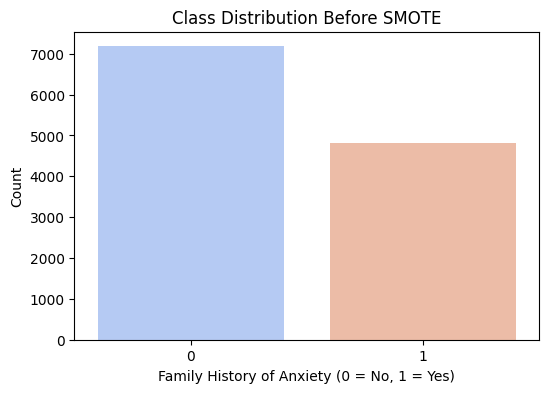

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Family History of Anxiety (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


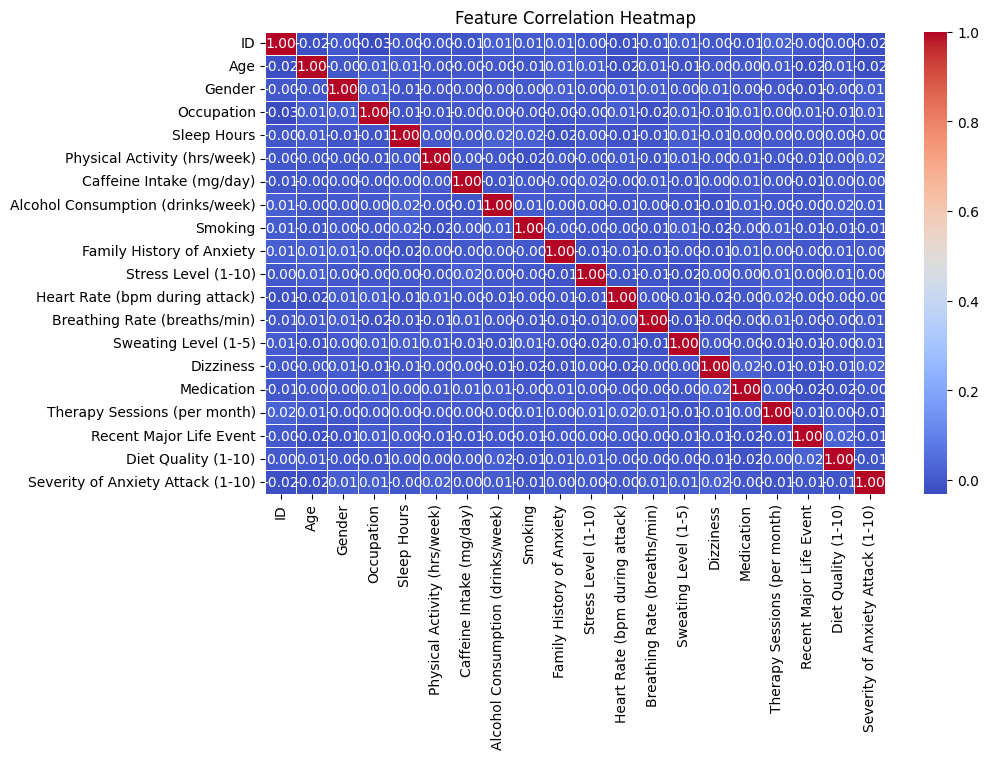

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


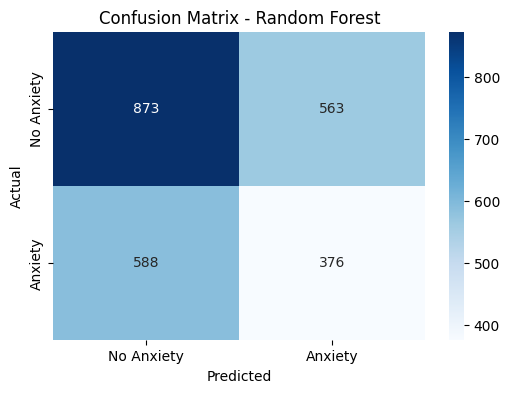

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Anxiety", "Anxiety"], yticklabels=["No Anxiety", "Anxiety"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


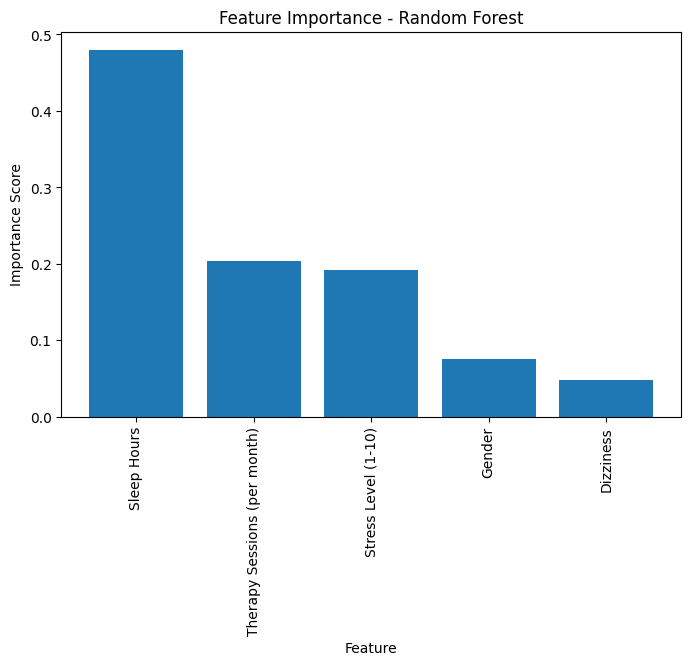

In [62]:
import numpy as np

feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(selected_features)), feature_importances[indices], align="center")
plt.xticks(range(len(selected_features)), np.array(selected_features)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()


In [63]:
# Best model evaluation
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Tuned Random Forest Performance:
Accuracy: 0.5979166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75      1436
           1       0.43      0.00      0.01       964

    accuracy                           0.60      2400
   macro avg       0.51      0.50      0.38      2400
weighted avg       0.53      0.60      0.45      2400

Confusion Matrix:
 [[1432    4]
 [ 961    3]]
